<a href="https://colab.research.google.com/github/yebiny/GANexample/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN


## Library import

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [39]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## hyper parameter

In [0]:
total_epoch = 30
batch_size = 100
learning_rate = 0.0002

## cell option parameter

In [0]:
n_hidden = 256
n_input = 28*28
n_noise = 128

In [0]:
X = tf.placeholder(tf.float32, [None, n_input]) 
Z = tf.placeholder(tf.float32, [None, n_noise])

## Generator
* hidden layer는 relu 사용하며 noise_z가 input으로 들어갑니다.
* output은 sigmoid를 사용하여 0과 1사이 값으로 output이 나오도록 합니다.

In [0]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden])) 

G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) 
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output
  
G_var_list = [G_W1, G_b1, G_W2, G_b2]

## Discriminator
* Distriminator의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값으로 나타납니다.
* 따라서 숫자 하나를 0으로 초기화합니다. 
* 첫번째 layer에서 relu를 사용하고 output은 sigmoid를 이용하여 0에서 1 사이 값을 출력합니다.

In [0]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))


D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1])) 

def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) 
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output
  
  
D_var_list = [D_W1, D_b1, D_W2, D_b2]

## Noise
* 랜덤 노이즈 Z를 생성하고 이를 이용해 랜덤한 이미지를 생성합니다.
* 생성된 이미지를 판별할 값을 실제 이미지를 이용해 구합니다.

In [0]:

def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))
G = generator(Z)

D_gene = discriminator(G)
D_real = discriminator(X)

## Generator loss

* 생성기(G)는 가짜 이미지를 넣었을 때 D가 실제 이미지라고 판단하도록 D_gene을 극대화 해야 합니다.
* GAN 논문의 수식에 따르면 loss를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에 loss_G에 음수 부호를 붙여줍니다.

In [0]:
loss_G = tf.reduce_mean(tf.log(D_gene))
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=G_var_list)

## Discriminator loss
* 판별기(D)에 진짜 이미지 tf.log(D_real)를 넣었을 때도 가짜 이미지 tf.log(1 - D_gene)를 넣었을 때도 최대값을 갖도록 학습합니다.
* GAN 논문의 수식에 따르면 loss를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에 loss_G에 음수 부호를 붙여줍니다.

In [0]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=D_var_list)

## Model training

Epoch: 0000 D loss: -0.7105 G loss: -1.713


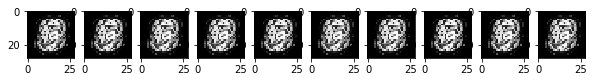

Epoch: 0001 D loss: -0.3395 G loss: -2.325
Epoch: 0002 D loss: -0.3042 G loss: -2.184
Epoch: 0003 D loss: -0.6714 G loss: -1.335
Epoch: 0004 D loss: -0.3739 G loss: -1.871
Epoch: 0005 D loss: -0.5185 G loss: -1.913
Epoch: 0006 D loss: -0.2026 G loss: -2.783
Epoch: 0007 D loss: -0.4215 G loss: -2.174
Epoch: 0008 D loss: -0.4247 G loss: -2.078
Epoch: 0009 D loss: -0.3632 G loss: -2.252


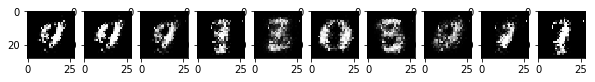

Epoch: 0010 D loss: -0.3901 G loss: -2.327
Epoch: 0011 D loss: -0.3453 G loss: -2.335
Epoch: 0012 D loss: -0.3582 G loss: -2.728
Epoch: 0013 D loss: -0.4762 G loss: -2.354
Epoch: 0014 D loss: -0.4339 G loss: -2.332
Epoch: 0015 D loss: -0.4198 G loss: -2.573
Epoch: 0016 D loss: -0.4534 G loss: -2.089
Epoch: 0017 D loss: -0.4017 G loss: -2.362
Epoch: 0018 D loss: -0.5006 G loss: -2.231
Epoch: 0019 D loss: -0.5464 G loss: -2.245


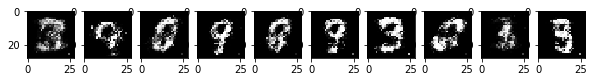

Epoch: 0020 D loss: -0.4539 G loss: -2.201
Epoch: 0021 D loss: -0.4652 G loss: -2.234
Epoch: 0022 D loss: -0.5416 G loss: -2.137
Epoch: 0023 D loss: -0.6842 G loss: -2.157
Epoch: 0024 D loss: -0.668 G loss: -2.122
Epoch: 0025 D loss: -0.5112 G loss: -2.355
Epoch: 0026 D loss: -0.5532 G loss: -2.163
Epoch: 0027 D loss: -0.6378 G loss: -2.132
Epoch: 0028 D loss: -0.564 G loss: -2.486
Epoch: 0029 D loss: -0.6827 G loss: -1.964


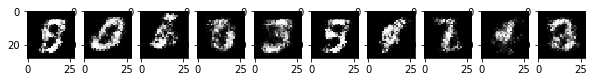

최적화 완료!


In [48]:
# 신경망 모델 학습

sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

total_batch = int(mnist.train.num_examples/batch_size) # 전체 이미지 갯수/batch_size 해서 한번 학습 할때 100batch_size로 몇번을 해야 1epoch을 도는지 계산
loss_val_D, loss_val_G = 0, 0 # 변수 0으로 초기화

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 보여줌
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].imshow(np.reshape(samples[i], (28, 28)), 'gray')
        
        plt.show()

print('최적화 완료!')